<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/revert-code-to-python/blob/master/2020_6_4_chap14_market_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=e543c849bea330ee5021084773a05c227d703ad1a3e6fb581f962185de7f663a
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
pip install yahoo_fin

In [0]:
pip install requests_html

     |████████████████████████████████| 153kB 7.0MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
  Created wheel for parse: filename=parse-1.15.0-cp36-none-any.whl size=23710 sha256=2ff8b64e67842c57e413e58ce9dfd154a241d62ccefa4eb95f464351ec59c7d8
  Stored in directory: /root/.cache/pip/wheels/07/ee/c8/eced0759f09fc635398ab1b8e89c38549b28e5db7fd4a53ba5
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=e0173e6d5f29e425f2493d93383cac9f511d4895a917ecef895f7dbca0895c45
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse fake-useragent
ERROR: pyppeteer 0.2.2 has requirement urllib3<2.0.0,>=1.25.8, but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [0]:
pip install requests

In [0]:
pip install bs4

In [0]:
!pip install -U -q PyDrive

In [0]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
from tabulate import tabulate
import datetime as dt#get current date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from yahoo_fin.stock_info import get_quote_table
import requests
from bs4 import BeautifulSoup
import matplotlib.ticker as mtick
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
def Usr_input():
  Stock=(input('Please enter ticker '+str(1)+'(default be WMT)-->') or 'WMT') # use or operation the set default input
  previousday = dt.date.today()-dt.timedelta(days=1)# get the date of previous day
  Default_end = previousday.strftime("%Y-%m-%d") # change the format of the default datetime 
  years_ago = dt.date.today()-dt.timedelta(days=1852)
  Default_start = years_ago.strftime("%Y-%m-%d")
  Start = input('Enter the start time(YYYY-MM-DD i.e 2014-12-16, press Enter Default = 5 Years ago)-->') or Default_start
  End = input('Enter the end time(YYYY-MM-DD i.e 2016-12-16, press Enter Default = Yesterday)-->') or Default_end
  T_interval = input('Please enter the time interval(you can choose 1d,1wk,1mo, press Enter Default = 1 month-->') or '1mo'
  return Stock, Start, End, T_interval

In [0]:
def calculate_ret(stock_a,stock_M,start,end_t,T_interval):
  Stock_price_a = yf.download(stock_a,start=start,end=end_t,interval = T_interval)['Adj Close'].dropna()
  Ret_a = Stock_price_a.pct_change()[1:]
  Stock_price_M = yf.download(stock_M,start=start,end=end_t,interval = T_interval)['Adj Close'].dropna()
  Ret_M = Stock_price_M.pct_change()[1:]
  Ret = pd.DataFrame([Ret_a,Ret_M])
  Ret = Ret.T
  Ret.columns = [stock_a,'SNP']
  return Ret

In [0]:
def html_beautifulsoup(url):
    response = requests.get(url)
    html = response.content

    #beautifulsoup html will not look like soure
    #review beautifulsoup html to use find and findall
    soup = BeautifulSoup(html,"lxml")
    return soup

#soup_html: soup html is not same as source html
def yahoo_description(soup_html):
    element = soup_html.find('h1',class_='D(ib) Fz(16px) Lh(18px)')
    return element.text  

In [0]:
(Ticker,macro_start,macro_end,macro_T_interval) = Usr_input()
soup_html = html_beautifulsoup("https://finance.yahoo.com/quote/"  +Ticker)
Ticker_shortN = yahoo_description(soup_html)

Please enter ticker 1(default be WMT)-->
Enter the start time(YYYY-MM-DD i.e 2014-12-16, press Enter Default = 5 Years ago)-->
Enter the end time(YYYY-MM-DD i.e 2016-12-16, press Enter Default = Yesterday)-->
Please enter the time interval(you can choose 1d,1wk,1mo, press Enter Default = 1 month-->


In [0]:
ret = calculate_ret(Ticker,'^GSPC',macro_start,macro_end,macro_T_interval)
ret_M = ret['SNP']
ret_a = ret[Ticker]

ret_Mc = sm.add_constant(ret_M)
results = sm.OLS(ret_a,ret_Mc).fit()
print('                                 Market Model')
print(results.summary())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                                 Market Model
                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     3.383
Date:                Fri, 05 Jun 2020   Prob (F-statistic):             0.0710
Time:                        12:53:16   Log-Likelihood:                 94.130
No. Observations:                  60   AIC:                            -184.3
Df Residuals:                      58   BIC:                            -180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    s

In [0]:
model = ols(Ticker+' ~ SNP',ret).fit()
anova_table = anova_lm(model)
print(anova_table)

            df    sum_sq   mean_sq         F    PR(>F)
SNP        1.0  0.008889  0.008889  3.382963  0.070994
Residual  58.0  0.152406  0.002628       NaN       NaN


Text(0, 0.5, 'WMT - Walmart Inc.index')

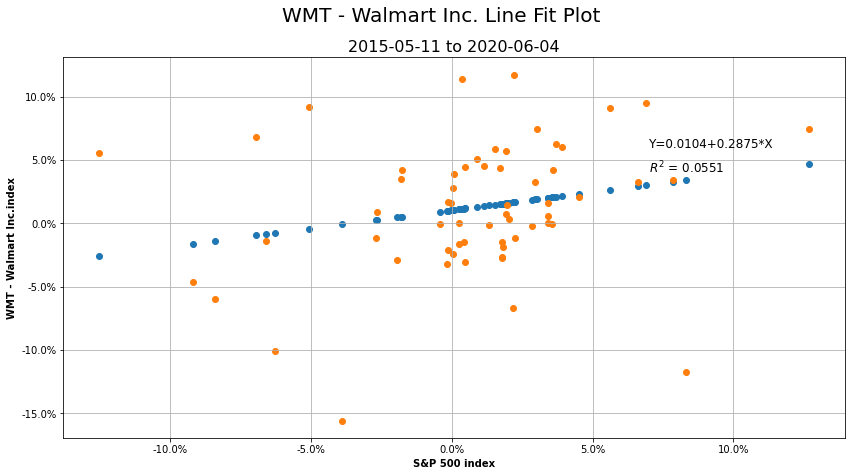

In [0]:
plt.figure(figsize=(14,7))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
(a,b) = results.params
R_sq = results.rsquared
predict = a+np.multiply(ret_M,b)
plt.scatter(ret_M*100,predict*100)
plt.scatter(ret_M*100,ret_a*100)
plt.text(7, 6, 'Y={:.4f}+{:.4f}*X'.format(a,b), fontsize=12)
plt.text(7, 4, r'$R^2$ = {:.4f}'.format(R_sq), fontsize=12)
plt.suptitle(Ticker_shortN+' Line Fit Plot',fontsize=20)
plt.title(macro_start+' to '+macro_end,fontsize = 16)
plt.grid(True)
plt.xlabel('S&P 500 index',fontweight='bold')
plt.ylabel(Ticker_shortN+'index',fontweight='bold')

In [0]:
a=get_quote_table('AAPL' , dict_result = True)
a = pd.DataFrame(a, index=[0])
a = a.T
a.columns = ['Value']
print(a)

                                                Value
1y Target Est                                  316.95
52 Week Range                         185.77 - 327.85
Ask                                      324.20 x 800
Avg. Volume                               4.62163e+07
Beta (5Y Monthly)                                1.24
Bid                                     324.01 x 1300
Day's Range                           320.83 - 325.62
EPS (TTM)                                       11.89
Earnings Date             Jul 28, 2020 - Aug 03, 2020
Ex-Dividend Date                         May 08, 2020
Forward Dividend & Yield                 3.28 (1.01%)
Market Cap                                     1.397T
Open                                           324.39
PE Ratio (TTM)                                  27.11
Previous Close                                 325.12
Quote Price                                    322.32
Volume                                    2.18901e+07


In [0]:
Ret = ret
Ret.columns = [Ticker_shortN,'S&P 500']
pd.options.display.float_format = '{:.4f}'.format
print(Ret)

            WMT - Walmart Inc.  S&P 500
Date                                   
2015-07-01              0.0148   0.0197
2015-08-01             -0.1007  -0.0626
2015-09-01              0.0085  -0.0264
2015-10-01             -0.1172   0.0830
2015-11-01              0.0280   0.0005
2015-12-01              0.0418  -0.0175
2016-01-01              0.0916  -0.0507
2016-02-01             -0.0003  -0.0041
2016-03-01              0.0324   0.0660
2016-04-01             -0.0164   0.0027
2016-05-01              0.0585   0.0153
2016-06-01              0.0392   0.0009
2016-07-01             -0.0007   0.0356
2016-08-01             -0.0210  -0.0012
2016-09-01              0.0164  -0.0012
2016-10-01             -0.0291  -0.0194
2016-11-01              0.0059   0.0342
2016-12-01             -0.0186   0.0182
2017-01-01             -0.0275   0.0179
2017-02-01              0.0628   0.0372
2017-03-01              0.0162  -0.0004
2017-04-01              0.0507   0.0091
2017-05-01              0.0455   0.0116


Download the file to local

In [0]:
Ret.to_csv('Market_model.csv') 
files.download('Market_model.csv')

Save file to google Drive

In [64]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#You will need to clink the link below to login to your account and then paste the password on the blank.
#The following will print out the current file you have on Drive, pick one folder you want and paste the id below
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Untitled0.ipynb, id: 1N_HdwT23n83iUCJNI9BeCcLA6Wo9amep
title: Colab Notebooks, id: 1hc7tCMBD_kCQFAa-KKkSiF_DyLduSc5e
title: minitabtoPY, id: 1e7Al_OTPirgaMsZ8VGOFESytRCo_2Pfo
title: hw2econ.pdf, id: 1T7OY-0BWYS4NsBBAbGMUVGaNW9v3qslB
title: Fillable New Employee Hire Form (2) copy.pdf, id: 1QM6jPyu6KqOY6cKqG1NwAY6nnMNBVfLs
title: On-Campus Job Confirmation Letter for SSN Applicants.pdf, id: 1bRXS5hZu2-VHxA0R1zFP0r_4iKlb2w-v
title: I94 - Official Website.pdf, id: 1ugIHVS2v7et-uKZ1T2Bb-RcAWqFUdf3z
title: cheat.pdf, id: 10mfPZPcAYl2RKanFp6DK2bhMa-9Cbjwu
title: midterm.pptx, id: 1LGdEyjcJhjGVntl6lT2nWk7cmM2EW5Xh
title: IMG_7108.HEIC.pdf, id: 1jPnPgZztI203Q2xkLWwXrOrcsKBL4oee
title: Getting started, id: 0Bx497oS87Y2Oc3RhcnRlcl9maWxlX2Rhc2hlclYw


The id_ below was setup to be 'Colab Notebooks' 

In [0]:
file = drive.CreateFile({'parents':[{u'id': '1hc7tCMBD_kCQFAa-KKkSiF_DyLduSc5e'}]})
file.SetContentFile('Market_model.csv')
file.Upload()